# Prediction of Diabetes Patient Readmission to Hospital

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv("diabetic_data.csv")

In [3]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.shape

(101766, 50)

In [5]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [8]:
# for each column
for c in list(data.columns):
    #  get a list of unique values
    n=data[c].unique()
    # if the number of unique values is less than 30 print values ,otherwise print the number of unoque values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c+':'+str(len(n))+'unique values')
    

encounter_id:101766unique values
patient_nbr:71518unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty:73unique values
num_lab_procedures:118unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications:75unique values
number_outpatient:39unique values
number_emergency:33unique values
number_inpatient
[ 0  1  2  3 

# Features and their description

1. Encounter Id - Unique identifier of an encounter
2. Patient Number - Unique identifier of a patient
3. Race - Caucasian, Asian, African American, Hispanic and Other
4. Gender - Categorized into Male, Female and Unknown/Invalid
5. Age - Grouped in 10-year intervals: [(0-10), (10-20).....,(90-100)]
6. Weight - Weight in pounds (grouped in 25 kg)
7. Admission_Type_id - Integer identifier corresponding to 8 different categories (Emergency, Urgent, Elective, Newborn, Not Available, NULL,Trauma Center, Not Mapped)
8. Discharge_disposition_id - Integer identifier corresponding to 26 different categories
(Discharged to home, Discharged/transferred to another short term hospital, Discharged/transferred to SNF, Discharged/transferred to ICF, Discharged/transferred to another type of inpatient care institution, Discharged/transferred to home with home health service, Left AMA, Discharged/transferred to home under care of Home IV provider, Admitted as an inpatient to this hospital, Neonate discharged to another hospital for neonatal aftercare, Expired, Still patient or expected to return for outpatient services, Hospice / home, Hospice / medical facility, Discharged/transferred within this institution to Medicare approved swing bed, Discharged/transferred/referred another institution for outpatient services, Discharged/transferred/referred to this institution for outpatient services, NULL, Expired at home. Medicaid only, hospice, Expired in a medical facility. Medicaid only, hospice, Expired, place unknown. Medicaid only, hospice, Discharged/transferred to another rehab fac including rehab units of a hospital, Discharged/transferred to a long term care hospital, Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare, Not Mapped, Unknown/Invalid, Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere, Discharged/transferred to a federal health care facility, Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital, Discharged/transferred to a Critical Access Hospital (CAH).)

9. Admission_source_id - Integer identifier corresponding to 26 different categories.
(Physician Referral, Clinic Referral, HMO Referral, Transfer from a hospital, Transfer from a Skilled Nursing Facility (SNF), Transfer from another health care facility, Emergency Room, Court/Law Enforcement, Not Available, Transfer from critial access hospital, Normal Delivery, Premature Delivery, Sick Baby, Extramural Birth, Not Available, NULL, Transfer From Another Home Health Agency, Readmission to Same Home Health Agency, Not Mapped, Unknown/Invalid, Transfer from hospital inpt/same fac reslt in a sep claim, Born inside this hospital, Born outside this hospital, Transfer from Ambulatory Surgery Center, Transfer from Hospice

10. Time in hospital - Number of days from admission to discharge
11. Payer code - Identifier corresponding to 18 distinct values for example Blue Cross, Self Pay, etc
12. Medical Speciality - Identifier corresponding to 73 distinct values for example Internal Medicine, Emergency/Trauma etc
13. Number of lab procedures - Number of lab tests performed during the encounter
14. Number of procudures - Number of procedures (other than lab tests) performed during the encounter
15. Number of medications - Number of distinct generic names administered during the encounter
16. Number of outpatient visits - Number of outpatient visits of the patient in the year preceding the encounter
17. Number of emergency visits - Number of emergency visits of the patient in the year preceding the encounter
18. Number of inpatient visits - Number of inpatient visits of the patient in the year preceding the encounter
19. Diagnosis 1 - The primary diagnosis (coded as first three digits of ICD9)
20. Diagnosis 2 - The secondary diagnosis (coded as first three digits of ICD9)
21. Disgnosis 3 - Additional secondary diagnosis (coded as first three digits of ICD9)
22. Number of diagnoses - Number of diagnoses entered to the system
23. Glucose serum test results - Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
24. A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
25. Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
26. Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
27. 24 different kind of medical drugs. The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
28. Readmitted Days to inpatient readmission. Values: “❤0” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission


In [9]:
# There is some missing data that are represented with ?. We will replace this with nan and deal in feature engineering section

In [10]:
data.replace("?",np.nan,inplace=True)

In [11]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

The most important column here is readmitted, which tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

In [12]:
print('Number of columns:',len(data.columns))

Number of columns: 50


In [13]:
data[list(data.columns)[:10]].head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1


In [14]:
data[list(data.columns)[10:20]].head()

,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN
1,NaN,NaN,59,0,18,0,0,0,276,250.01
2,NaN,NaN,11,5,13,2,0,1,648,250
3,NaN,NaN,44,1,16,0,0,0,8,250.43
4,NaN,NaN,51,0,8,0,0,0,197,157


In [15]:
data[list(data.columns)[20:30]].head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,NaN,1,None,None,No,No,No,No,No,No
1,255,9,None,None,No,No,No,No,No,No
2,V27,6,None,None,No,No,No,No,No,No
3,403,7,None,None,No,No,No,No,No,No
4,250,5,None,None,No,No,No,No,No,No


In [16]:
data[list(data.columns)[30:40]].head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No


In [17]:
data[list(data.columns)[40:50]].head()

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,No,No,NO
1,No,Up,No,No,No,No,No,Ch,Yes,>30
2,No,No,No,No,No,No,No,No,Yes,NO
3,No,Up,No,No,No,No,No,Ch,Yes,NO
4,No,Steady,No,No,No,No,No,Ch,Yes,NO


From analysis of the columns, we can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out,

- there are missing values in race,weight,payer_code, medical_specialty,diag_1,diag_2, diag_3
- encounter_id and patient_nbr: these are just identifiers and not useful variables
- age and weight: are categorical in this data set

In [18]:

data.isnull().sum().sort_values(ascending = False).head(8)


weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
dtype: int64

In [19]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing.sort_values(ascending=False).head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

more than 96 % of weight are missing, so we can drop the column

encounter_id and patient_nbr: these are just identifiers and not useful variables so they can be dropped, weight has more than 96% of null values.So drop weight .

In [20]:
data=data.drop(columns=['encounter_id','patient_nbr','weight'])

# Race 

race : It is a categorical variable.

Here we will replace the missing data points values with 'Other' category, as most likely people who skip filling their race have done that because they couldn't find their race listed within the options.

In [21]:
data['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [22]:
data['race'].fillna('Other',inplace=True)

In [23]:
mapped_race={"Hispanic":"Other","Asian":"Other"}

In [24]:
data['race']=data['race'].replace(mapped_race)

In [25]:
data['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other'], dtype=object)

<AxesSubplot:ylabel='race'>

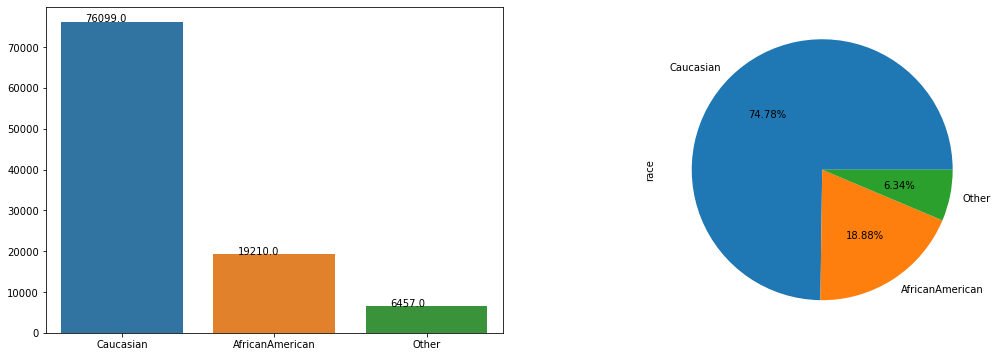

In [26]:
fig,axes = plt.subplots(1,2, figsize = (18,6))
plot = sns.barplot(data=data, x=data['race'].value_counts().index, y = data['race'].value_counts().values, ax = axes[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/5, p.get_height()+100))
data['race'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', ax = axes[1])

From the above bar and pie chart we can clearly see that Caucasian race are domination with close to 77%, followed by AfricanAmerican with around 19%

# Gender

In [27]:
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

There is a 3rd category of Unknown/Invalid which are missing/unknown values ,as there count is less so they can be dropped

In [28]:
data.drop(data[data.gender=='Unknown/Invalid'].index, inplace=True) 

In [29]:
data['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

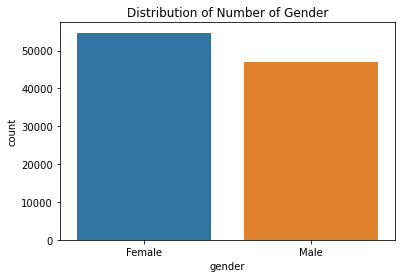

In [30]:
sns.countplot(x = "gender", data = data)
plt.title("Distribution of Number of Gender")
plt.show()


# Age

In [31]:
data['age'].value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [32]:
data['age']=data['age'].replace({'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55,
       '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95})

In [33]:
data['age'].value_counts()

75    26066
65    22482
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

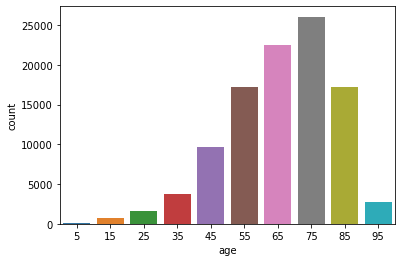

In [34]:
sns.countplot(x="age", data = data)
#plt.xticks(rotation = 90)
plt.show()

# admission_type_id

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


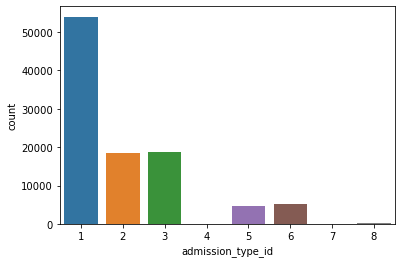

In [35]:
sns.countplot(data['admission_type_id'])
plt.show()

There are 8 unique values ranging from 1 to 8. These 8 values correspond to :

1 Emergency

2 Urgent

3 Elective

4 Newborn

5 Not Available

6 NULL

7 Trauma Center

8 Not Mapped

For further analysis we can merger these categories into less number of categories.

Emeregncy/Urgent/Trauma Center ---> Emergency

Not Available/Null/Not Mapped ---> Not Available

Elective ---> Elective

New Born ---> New Born

In [36]:
data['admission_type_id']=data['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                 5:'Not Available', 6:'Not Available', 8:'Not Available',
                                 3:'Elective',4:'Newborn'})

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


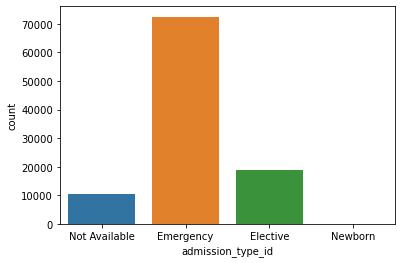

In [37]:
sns.countplot(data['admission_type_id'])
plt.show()

From this we can see that the majority patients that have been admitted in this hospital have an admission type as emergency.

In [38]:
data[data['admission_type_id']== 'Newborn'][['gender','age','admission_type_id']]

,gender,age,admission_type_id
2043,Male,55,Newborn
2203,Male,85,Newborn
2461,Male,75,Newborn
4823,Female,65,Newborn
35877,Male,65,Newborn
47548,Male,45,Newborn
48711,Female,75,Newborn
80354,Female,5,Newborn
87714,Male,65,Newborn
100721,Male,85,Newborn


Droppping the category new born because the admission_type_id == newborn and the age and gender corresponding to it gives contradictory information.

In [39]:
data=data[data['admission_type_id']!='Newborn']
#data.drop(data.index[data['admission_type_id'] == 'Newborn'], inplace = True)

In [40]:
data['admission_type_id'].value_counts()

Emergency        72489
Elective         18868
Not Available    10396
Name: admission_type_id, dtype: int64

# discharge_disposition_id 

In [41]:
data['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
discharge_disposition_id description

1 Discharged to home

2 Discharged/transferred to another short term hospital

3 Discharged/transferred to SNF(skilled nursing facility)

4 Discharged/transferred to ICF(intermediate care facility)

5 Discharged/transferred to another type of inpatient care institution

6 Discharged/transferred to home with home health service

7 Left AMA(Against Medical Advice.)

8 Discharged/transferred to home under care of Home IV provider

9 Admitted as an inpatient to this hospital

10 Neonate discharged to another hospital for neonatal aftercare

11 Expired

12 Still patient or expected to return for outpatient services

13 Hospice / home

14 Hospice / medical facility

15 Discharged/transferred within this institution to Medicare approved swing bed

16 Discharged/transferred/referred another institution for outpatient services

17 Discharged/transferred/referred to this institution for outpatient services

18 NULL

19 Expired at home. Medicaid only, hospice.

20 Expired in a medical facility. Medicaid only, hospice.

21 Expired, place unknown. Medicaid only, hospice.

22 Discharged/transferred to another rehab fac including rehab units of a hospital .

23 Discharged/transferred to a long term care hospital.

24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25 Not Mapped

26 Unknown/Invalid

30 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27 Discharged/transferred to a federal health care facility.

28 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29 Discharged/transferred to a Critical Access Hospital (CAH).

We can merge several groups over here to reduce the number of categories:

1 ---> Discharged to home

2/3/4/5/10/16/22/23/24/30/27/28/29 ---> Transferred to another medical facility

7 ---> Left AMA(Against Medical Advice.)

6/8 ---> Discharged to home with home health service

9/12/15/17 ---> Still patient/referred to this institution

11/19/20/21 ---> Expired

18/25/26 ---> Not Available

13/14 ---> Hospice

In [42]:
data['discharge_disposition_id']=data['discharge_disposition_id'].replace({1:'Discharged to home',
                                        2:'Transferred to another medical facility',
                                        3:'Transferred to another medical facility',
                                        4:'Transferred to another medical facility',
                                        5:'Transferred to another medical facility',
                                        16:'Transferred to another medical facility',
                                        22:'Transferred to another medical facility',
                                        23:'Transferred to another medical facility',
                                        24:'Transferred to another medical facility',
                                        27:'Transferred to another medical facility',
                                        28:'Transferred to another medical facility',
                                        29:'Transferred to another medical facility',                            
                                        6:'Discharged to home with home health service',
                                        8:'Discharged to home with home health service',
                                        10:'Neonate discharge',
                                        7:'Left AMA',
                                        9:'Still patient/referred to this institution',
                                        12:'Still patient/referred to this institution',
                                        15:'Still patient/referred to this institution',
                                        17:'Still patient/referred to this institution',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'})


In [43]:
data.discharge_disposition_id.value_counts()

Discharged to home                             60226
Transferred to another medical facility        20688
Discharged to home with home health service    13006
Not Available                                   4680
Expired                                         1652
Hospice                                          771
Left AMA                                         623
Still patient/referred to this institution       101
Neonate discharge                                  6
Name: discharge_disposition_id, dtype: int64

The patients who have expired should be removed from the system beacuse they will create bias as they will not be readmitted.

In [44]:
data=data[data['discharge_disposition_id']!='Expired']
data=data[data['discharge_disposition_id']!='Neonate discharge']
data=data[data['discharge_disposition_id']!='Hospice']

In [45]:
data.discharge_disposition_id.value_counts()

Discharged to home                             60226
Transferred to another medical facility        20688
Discharged to home with home health service    13006
Not Available                                   4680
Left AMA                                         623
Still patient/referred to this institution       101
Name: discharge_disposition_id, dtype: int64

# admission_source_id: 


Integer identifier corresponding to 17 distinct values, for example, physician referral, emergency room, and transfer from a hospital

1 Physician Referral

2 Clinic Referral

3 HMO Referral(Health Maintenance Organization)

4 Transfer from a hospital

5 Transfer from a Skilled Nursing Facility (SNF)

6 Transfer from another health care facility

7 Emergency Room

8 Court/Law Enforcement

9 Not Available

10 Transfer from critial access hospital

11 Normal Delivery

12 Premature Delivery

13 Sick Baby

14 Extramural Birth

15 Not Available

17 NULL

18 Transfer From Another Home Health Agency

19 Readmission to Same Home Health Agency

20 Not Mapped

21 Unknown/Invalid

22 Transfer from hospital inpt/same fac reslt in a sep claim

23 Born inside this hospital

24 Born outside this hospital

25 Transfer from Ambulatory Surgery Center

26 Transfer from Hospice

We can merge several grps over here to reduce the number of categories:
1/2/3 ---> Referral

4/5/6/10/18/19/25/26/22 ---> Transferred from another health care facility

7 ---> Emergency

9/15/17/20/21 ---> Not Available

8 ---> Court/Law Enforcement

Delivery ---> 11/12/14/13/23/24

In [46]:
data['admission_source_id']=data['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   7:'Emergency',                                    
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   8 :'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",                                    
                                   24:'Delivery'})

In [47]:
data['admission_source_id'].value_counts()

Emergency                                        55858
Referral                                         30428
Not Available                                     6854
Transferred from another health care facility     6180
Delivery                                             4
Name: admission_source_id, dtype: int64

In [48]:
data[data['admission_source_id']=='Delivery'][['gender','age','admission_source_id']]

,gender,age,admission_source_id
83432,Female,75,Delivery
83510,Female,25,Delivery
85588,Female,75,Delivery
97384,Male,75,Delivery


In [49]:
data=data[data['admission_source_id']!='Delivery']


In [50]:
data['admission_source_id'].value_counts()

Emergency                                        55858
Referral                                         30428
Not Available                                     6854
Transferred from another health care facility     6180
Name: admission_source_id, dtype: int64

# Time in hospital: Integer number of days between admission and discharge

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


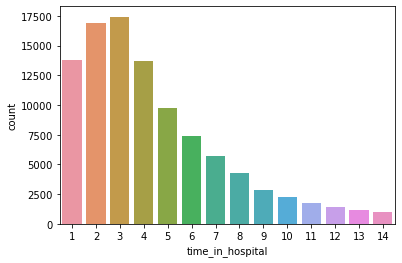

In [51]:
sns.countplot(data.time_in_hospital)
plt.show()

The time in the hospital ranges from 1 day to 14 days.

# payer_code : 
    
Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

In [52]:
data.payer_code.value_counts(1)*100

MC    52.277505
HM    10.336370
SP     8.244068
BC     7.676778
MD     5.793039
CP     4.107852
UN     4.021090
CM     3.130110
OG     1.686856
PO     0.976074
DM     0.909334
CH     0.236927
WC     0.225248
OT     0.153502
MP     0.131812
SI     0.091768
FR     0.001669
Name: payer_code, dtype: float64

Payer code has a significant number (approx. 40% )of missing values and it are not signification w.r.t the patient readmission so we can drop it.

In [53]:
data.drop(['payer_code'],axis=1,inplace=True)

# medical_specialty

 Integer identifier of a specialty of the admitting physician, corresponding to 73 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

In [54]:
data.medical_specialty.nunique()

72

In [55]:
data.medical_specialty.value_counts(1)*100

InternalMedicine                    28.063327
Emergency/Trauma                    14.627078
Family/GeneralPractice              14.295854
Cardiology                          10.405946
Surgery-General                      6.029061
                                      ...    
Perinatology                         0.001972
Neurophysiology                      0.001972
Psychiatry-Addictive                 0.001972
Pediatrics-InfectiousDiseases        0.001972
Surgery-PlasticwithinHeadandNeck     0.001972
Name: medical_specialty, Length: 72, dtype: float64

There are 73 unique values here and a 48.8% of values are missing ('?') hence we drop this column.

In [56]:
data.drop(['medical_specialty'],axis=1,inplace=True)

# num_lab_procedures: Number of lab tests performed during the encounter

In [57]:
print('The number of lab tests a patient has undergone can range from',data.num_lab_procedures.min(),'to',data.num_lab_procedures.max())

The number of lab tests a patient has undergone can range from 1 to 132


# num_procedures: Number of procedures(other than lab tests) performed during the encounter

In [58]:
data.num_procedures.value_counts()

0    45672
1    20246
2    12366
3     9202
6     4799
4     4048
5     2987
Name: num_procedures, dtype: int64

No of procedures range from 0 to 5

# num_medications: Number of distinct generic names administered during the encounter

In [59]:
print('The number of medications range from a minimum of',data.num_medications.min(),'to maximum of',data.num_medications.max())

The number of medications range from a minimum of 1 to maximum of 81


number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter

number_emergency : Number of emergency visits of the patient in the year preceding the encounter

number_inpatient: Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis1: The primary diagnosis(coded as first three digits of ICD9)

Diagnosis2: Secondary diagnosis(coded as first three digits of ICD9)

Diagnosis3: Additional secondary diagnosis(coded as first three digits of ICD9)

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage. so we combined these features into a new variable called Service utilization

In [60]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient'] #year_visits

In [61]:
data.drop(['number_outpatient','number_emergency','number_inpatient'],axis=1,inplace=True)

In [62]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,No,No,No,No,No,Yes,NO,3
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


# Diag1, Diag2 and Diag3

Diagnosis 1 (Nominal) : The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
Diagnosis 2 (Nominal) : Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
Diagnosis 3 (Nominal) : Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
Diabetes:0
Circulatory:1
Respiratory:2
Digestive:3
Injury:4
Musculoskelet:5
Genitourinory:6
Neoplasms:7
Others:8

In [63]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [64]:
df=data.copy()

In [65]:
df = map_diagnosis(df,["diag_1","diag_2","diag_3"])

Diagnosis” stands for a primary diagnosis with possible values:
“circulatory” for icd9: 390–459, 785,
“digestive”—icd9: 520–579, 787;
“genitourinary”—icd9:580–629, 788,
“diabetes”—icd9: 250.xx,
“injury” icd9: 800–999,
“musculoskeletal”—icd9: 710–739;
“neoplasms”—icd9: 140–239,
“respiratory” icd9: 460–519,786,
“other” otherwise

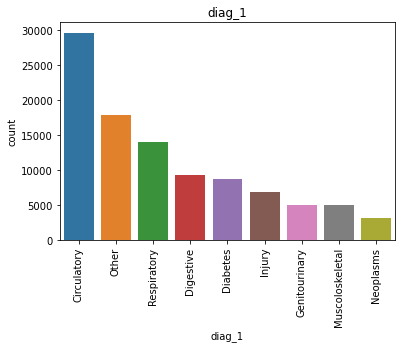

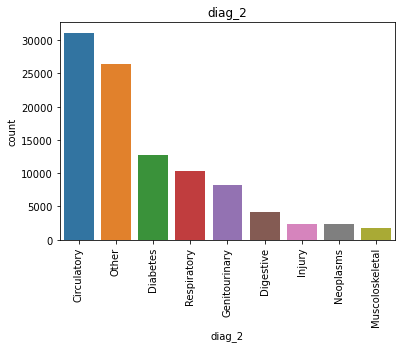

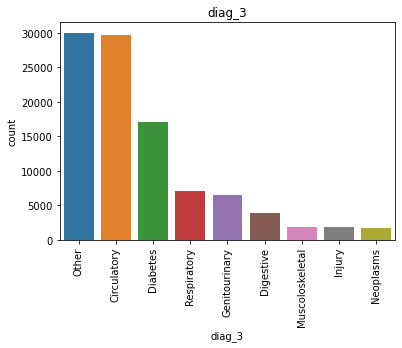

In [66]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,df)

In [67]:
df["diag_1"] = df["diag_1"].replace({"Circulatory":0,
                                     "Respiratory":1,
                                     "Digestive":2,
                                     "Diabetes":3,
                                     "Injury":4,
                                     "Muscoloskeletal":5,
                                     "Genitourinary":6,
                                     "Neoplasms":7,
                                    "Other":8})
df.diag_1.value_counts()

0    29673
8    17810
1    13932
2     9332
3     8660
4     6848
6     5002
5     4932
7     3131
Name: diag_1, dtype: int64

In [68]:
df["diag_2"] = df["diag_2"].replace({"Circulatory":0,
                                     "Respiratory":1,
                                     "Digestive":2,
                                     "Diabetes":3,
                                     "Injury":4,
                                     "Muscoloskeletal":5,
                                     "Genitourinary":6,
                                     "Neoplasms":7,
                                    "Other":8})
df.diag_2.value_counts()

0    31150
8    26376
3    12703
1    10388
6     8146
2     4088
4     2382
7     2326
5     1761
Name: diag_2, dtype: int64

In [69]:
df["diag_3"] = df["diag_3"].replace({"Circulatory":0,
                                     "Respiratory":1,
                                     "Digestive":2,
                                     "Diabetes":3,
                                     "Injury":4,
                                     "Muscoloskeletal":5,
                                     "Genitourinary":6,
                                     "Neoplasms":7,
                                    "Other":8})
df.diag_3.value_counts()

8    30002
0    29592
3    16973
1     7005
6     6436
2     3857
5     1898
4     1896
7     1661
Name: diag_3, dtype: int64

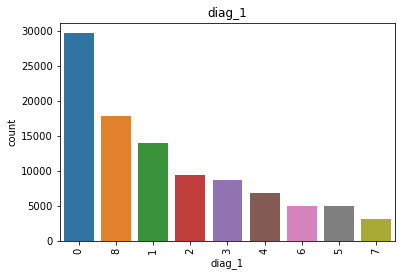

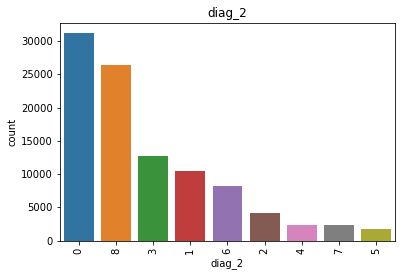

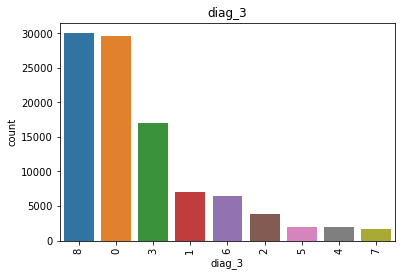

In [70]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,df)

# number_diagnoses 

In [71]:
df['number_diagnoses'].value_counts()

9     47803
5     11293
8     10359
7     10212
6      9984
4      5498
3      2822
2      1021
1       219
16       42
13       16
10       16
11       11
15       10
12        8
14        6
Name: number_diagnoses, dtype: int64

# max_glu_serum 

In [72]:
df.max_glu_serum.value_counts()

None    94173
Norm     2543
>200     1416
>300     1188
Name: max_glu_serum, dtype: int64

It indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
We also reducing Glucose serum test result into categories of Normal(1), Abnormal(2) and Not tested(0).

In [73]:
df["max_glu_serum"] = df["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0}) 

In [74]:
df.max_glu_serum.value_counts()

0    94173
2     2604
1     2543
Name: max_glu_serum, dtype: int64

# A1Cresult: Indicates the range of the result or if the test was not taken.

In [75]:
df.A1Cresult.value_counts()

None    82489
>8       8136
Norm     4922
>7       3773
Name: A1Cresult, dtype: int64

Values: “>8” if the result was greater than 8%

    “>7” if the result was greater than 7% but less than 8%

    “normal” if the result was less than 7%

    “none” if not measured.

# features for medications 

For the generic names : metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone

The feature indicates whether the drug was prescribed or there was a change in the dosage.

Values: “up” if the dosage was increased during the encounter

    “down” if the dosage was decreased

    “steady” if the dosage did not change

    “no” if the drug was not prescribed


In [76]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,No,No,No,No,No,Yes,NO,3
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,Emergency,Transferred to another medical facility,Emergency,3,51,0,16,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,AfricanAmerican,Female,85,Emergency,Transferred to another medical facility,Transferred from another health care facility,5,33,3,18,...,Steady,No,No,No,No,No,No,Yes,NO,1
101763,Caucasian,Male,75,Emergency,Discharged to home,Emergency,1,53,0,9,...,Down,No,No,No,No,No,Ch,Yes,NO,1
101764,Caucasian,Female,85,Emergency,Transferred to another medical facility,Emergency,10,45,2,21,...,Up,No,No,No,No,No,Ch,Yes,NO,1


In [77]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

In [78]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in meds:
       print(i, df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']


In [79]:
meds=list(df.iloc[:,16:39].columns)
meds

['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

metformin
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


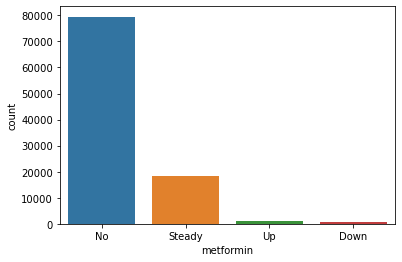

repaglinide
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


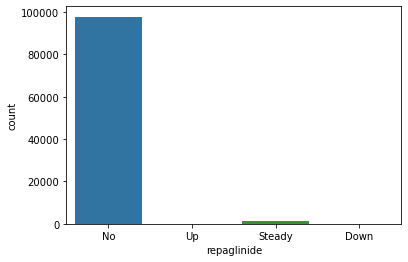

nateglinide


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


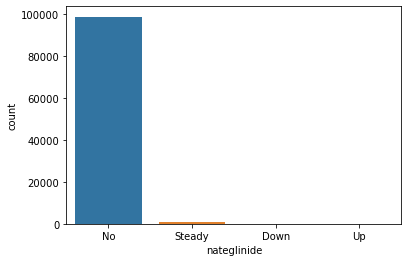

chlorpropamide
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


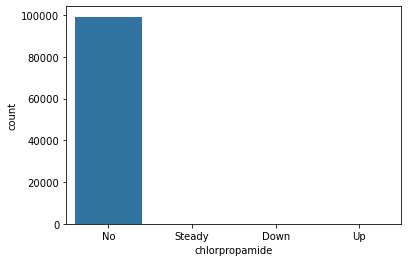

glimepiride
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


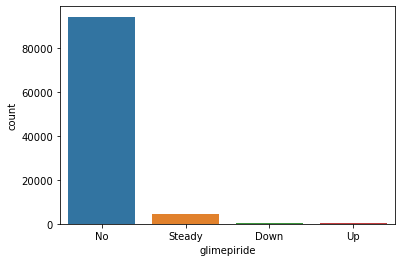

acetohexamide
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


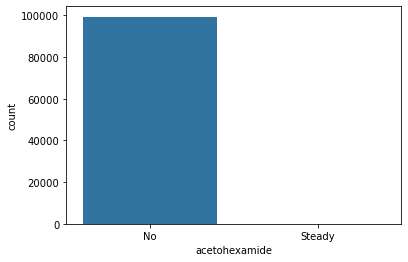

glipizide


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


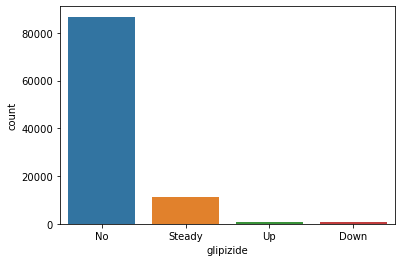

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


glyburide
AxesSubplot(0.125,0.125;0.775x0.755)


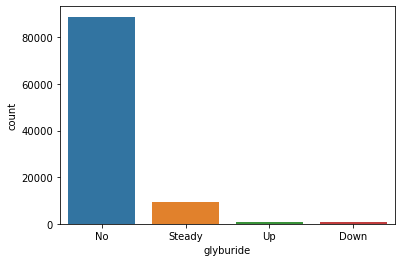

tolbutamide
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


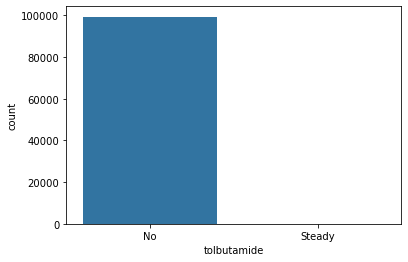

pioglitazone


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


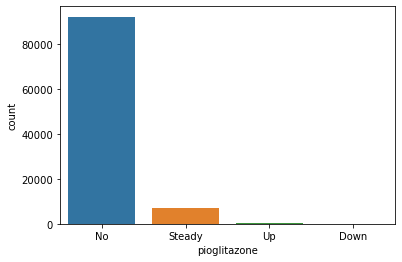

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


rosiglitazone
AxesSubplot(0.125,0.125;0.775x0.755)


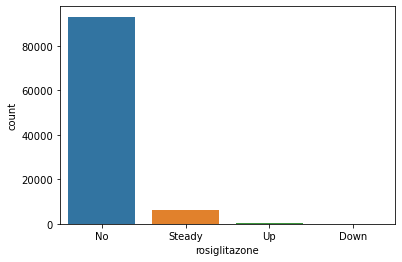

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


acarbose
AxesSubplot(0.125,0.125;0.775x0.755)


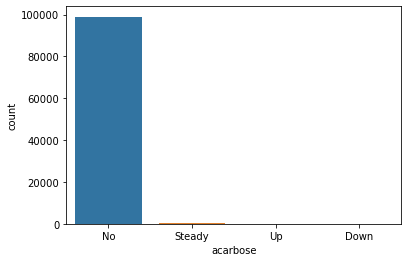

miglitol


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


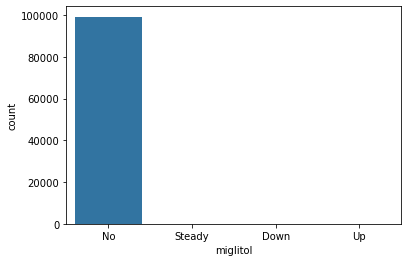

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


troglitazone
AxesSubplot(0.125,0.125;0.775x0.755)


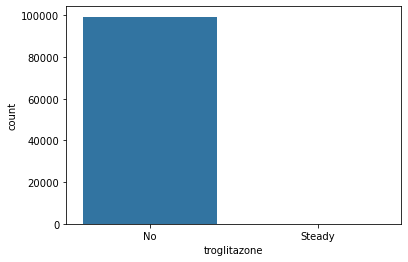

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


tolazamide
AxesSubplot(0.125,0.125;0.775x0.755)


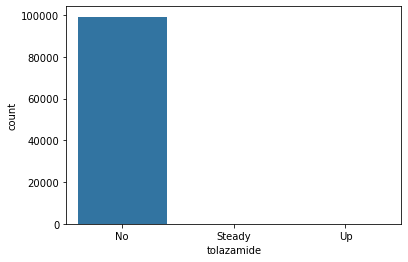

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


examide
AxesSubplot(0.125,0.125;0.775x0.755)


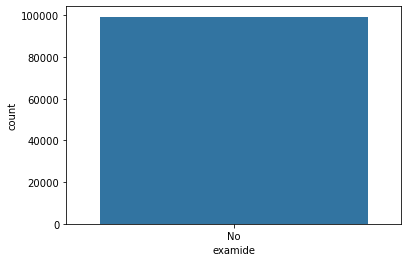

citoglipton
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


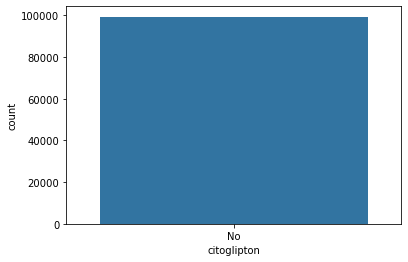

insulin


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


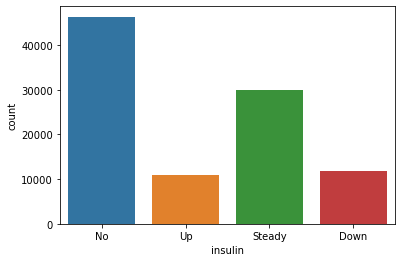

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


glyburide-metformin
AxesSubplot(0.125,0.125;0.775x0.755)


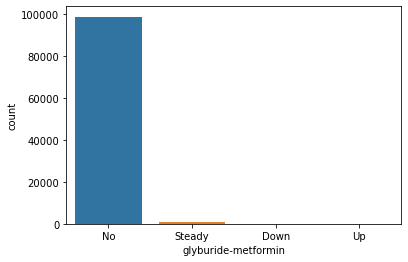

glipizide-metformin
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


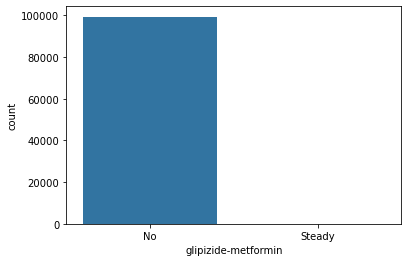

glimepiride-pioglitazone


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


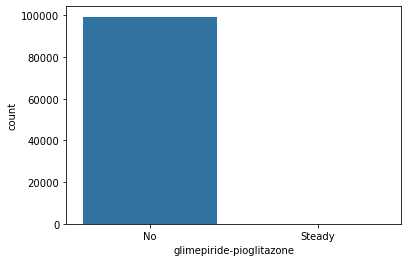

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


metformin-rosiglitazone
AxesSubplot(0.125,0.125;0.775x0.755)


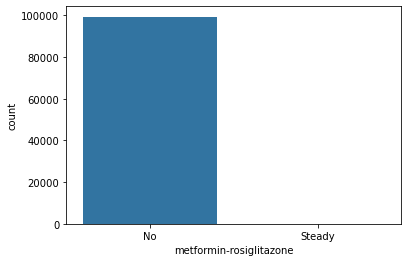

metformin-pioglitazone


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


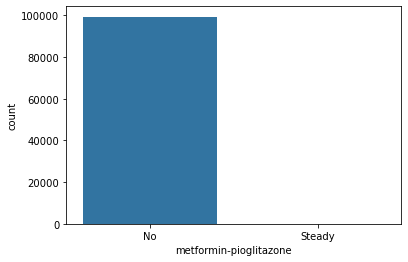

In [80]:
for i in meds:
    print(i)
    print(sns.countplot(df[i]))
    plt.show()

In [81]:
l1=['metformin','glipizide','insulin','glyburide']

metformin
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


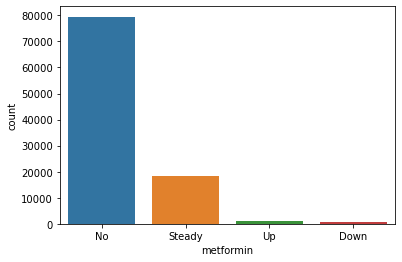

glipizide
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


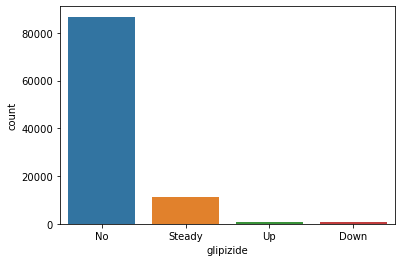

insulin
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


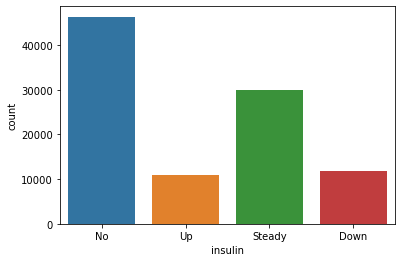

glyburide


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


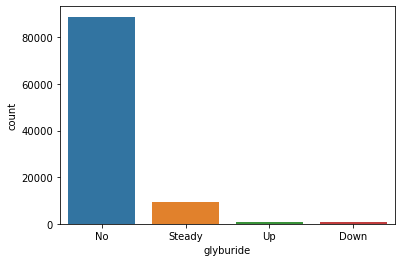

In [82]:
for i in l1:
    print(i)
    print(sns.countplot(df[i]))
    plt.show()

In [83]:
for i in l1:
    df[i]=df[i].apply(lambda x: 0 if (x== 'No' or x=='Steady') else 1) 

In [84]:
df=df.drop(['repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone'],axis=1)

In [85]:
# We can drop examide, citoglipton and metformin-rosiglitazone as it is not prescribed to any patient.
df.drop(['examide', 'citoglipton'], axis = 1, inplace = True)

# change : Indicates if there was a change in diabetic medications (either dosage or generic name)

In [86]:
df.change.value_counts()

No    53205
Ch    46115
Name: change, dtype: int64

In [87]:
df['change'] = df['change'].replace({'No' : 0, 'Ch' : 1})


# diabetesMed : Indicates if there was any diabetic medication prescribed.

In [88]:
df.diabetesMed.value_counts()


Yes    76701
No     22619
Name: diabetesMed, dtype: int64

In [89]:
df['diabetesMed'] = df['diabetesMed'].replace({'Yes' : 1, 'No' : 0})

# readmitted: Outcome variable

In [90]:
df.readmitted.value_counts()

NO     52511
>30    35496
<30    11313
Name: readmitted, dtype: int64

In [91]:
df['readmitted'] = df['readmitted'].replace('>30', 'NO')
df['readmitted']= df['readmitted'].replace( {'NO': 0, '<30': 1} ).astype(int)

In [92]:
df.shape

(99320, 24)

# Encoding

In [93]:
df = pd.get_dummies(df,columns=['race','gender'])


In [94]:
df.columns

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glipizide', 'glyburide', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'service_utilization', 'race_AfricanAmerican',
       'race_Caucasian', 'race_Other', 'gender_Female', 'gender_Male'],
      dtype='object')

In [95]:
df['admission_source_id']=df['admission_source_id'].replace({'Emergency':0,'Referral':1,
                                                             'Not Available':2,'Transferred from another health care facility':3})

In [96]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({'Discharged to home':0,'Transferred to another medical facility':1,
                                                                       'Not Available':2,'Left AMA':3,'Discharged to home with home health service':5,
                                                                       'Still patient/referred to this institution':4})

In [97]:

df['admission_type_id']=df['admission_type_id'].replace({'Emergency':0,'Elective':1,'Not Available':2})

In [98]:
df['A1Cresult']=df['A1Cresult'].replace({'None' :0,'>7':2, '>8':2, 'Norm':1})

In [99]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,...,insulin,change,diabetesMed,readmitted,service_utilization,race_AfricanAmerican,race_Caucasian,race_Other,gender_Female,gender_Male
0,5,2,2,1,1,41,0,1,3,8,...,0,0,0,0,0,0,1,0,1,0
1,15,0,0,0,3,59,0,18,8,3,...,1,1,1,0,0,0,1,0,1,0
2,25,0,0,0,2,11,5,13,8,3,...,0,0,1,0,3,1,0,0,1,0
3,35,0,0,0,2,44,1,16,8,3,...,1,1,1,0,0,0,1,0,0,1
4,45,0,0,0,1,51,0,8,7,7,...,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,75,0,1,0,3,51,0,16,3,8,...,1,1,1,0,0,1,0,0,0,1
101762,85,0,1,3,5,33,3,18,2,8,...,0,0,1,0,1,1,0,0,1,0
101763,75,0,0,0,1,53,0,9,8,6,...,1,1,1,0,1,0,1,0,0,1
101764,85,0,1,0,10,45,2,21,4,8,...,1,1,1,0,1,0,1,0,1,0


In [100]:
# for each column
for c in list(df.columns):
    #  get a list of unique values
    n=df[c].unique()
    # if the number of unique values is less than 30 print values ,otherwise print the number of unoque values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c+':'+str(len(n))+'unique values')

age
[ 5 15 25 35 45 55 65 75 85 95]
admission_type_id
[2 0 1]
discharge_disposition_id
[2 0 1 5 3 4]
admission_source_id
[1 0 3 2]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures:118unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications:75unique values
diag_1
[3 8 7 0 1 4 5 2 6]
diag_2
[8 3 7 0 1 4 5 6 2]
diag_3
[8 0 3 1 4 7 6 5 2]
number_diagnoses
[ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
max_glu_serum
[0 2 1]
A1Cresult
[0 2 1]
metformin
[0 1]
glipizide
[0 1]
glyburide
[0 1]
insulin
[0 1]
change
[0 1]
diabetesMed
[0 1]
readmitted
[0 1]
service_utilization:47unique values
race_AfricanAmerican
[0 1]
race_Caucasian
[1 0]
race_Other
[0 1]
gender_Female
[1 0]
gender_Male
[0 1]


df.drop(["num_lab_procedures","num_medications","service_utilization"],axis=1,inplace=True)

<AxesSubplot:>

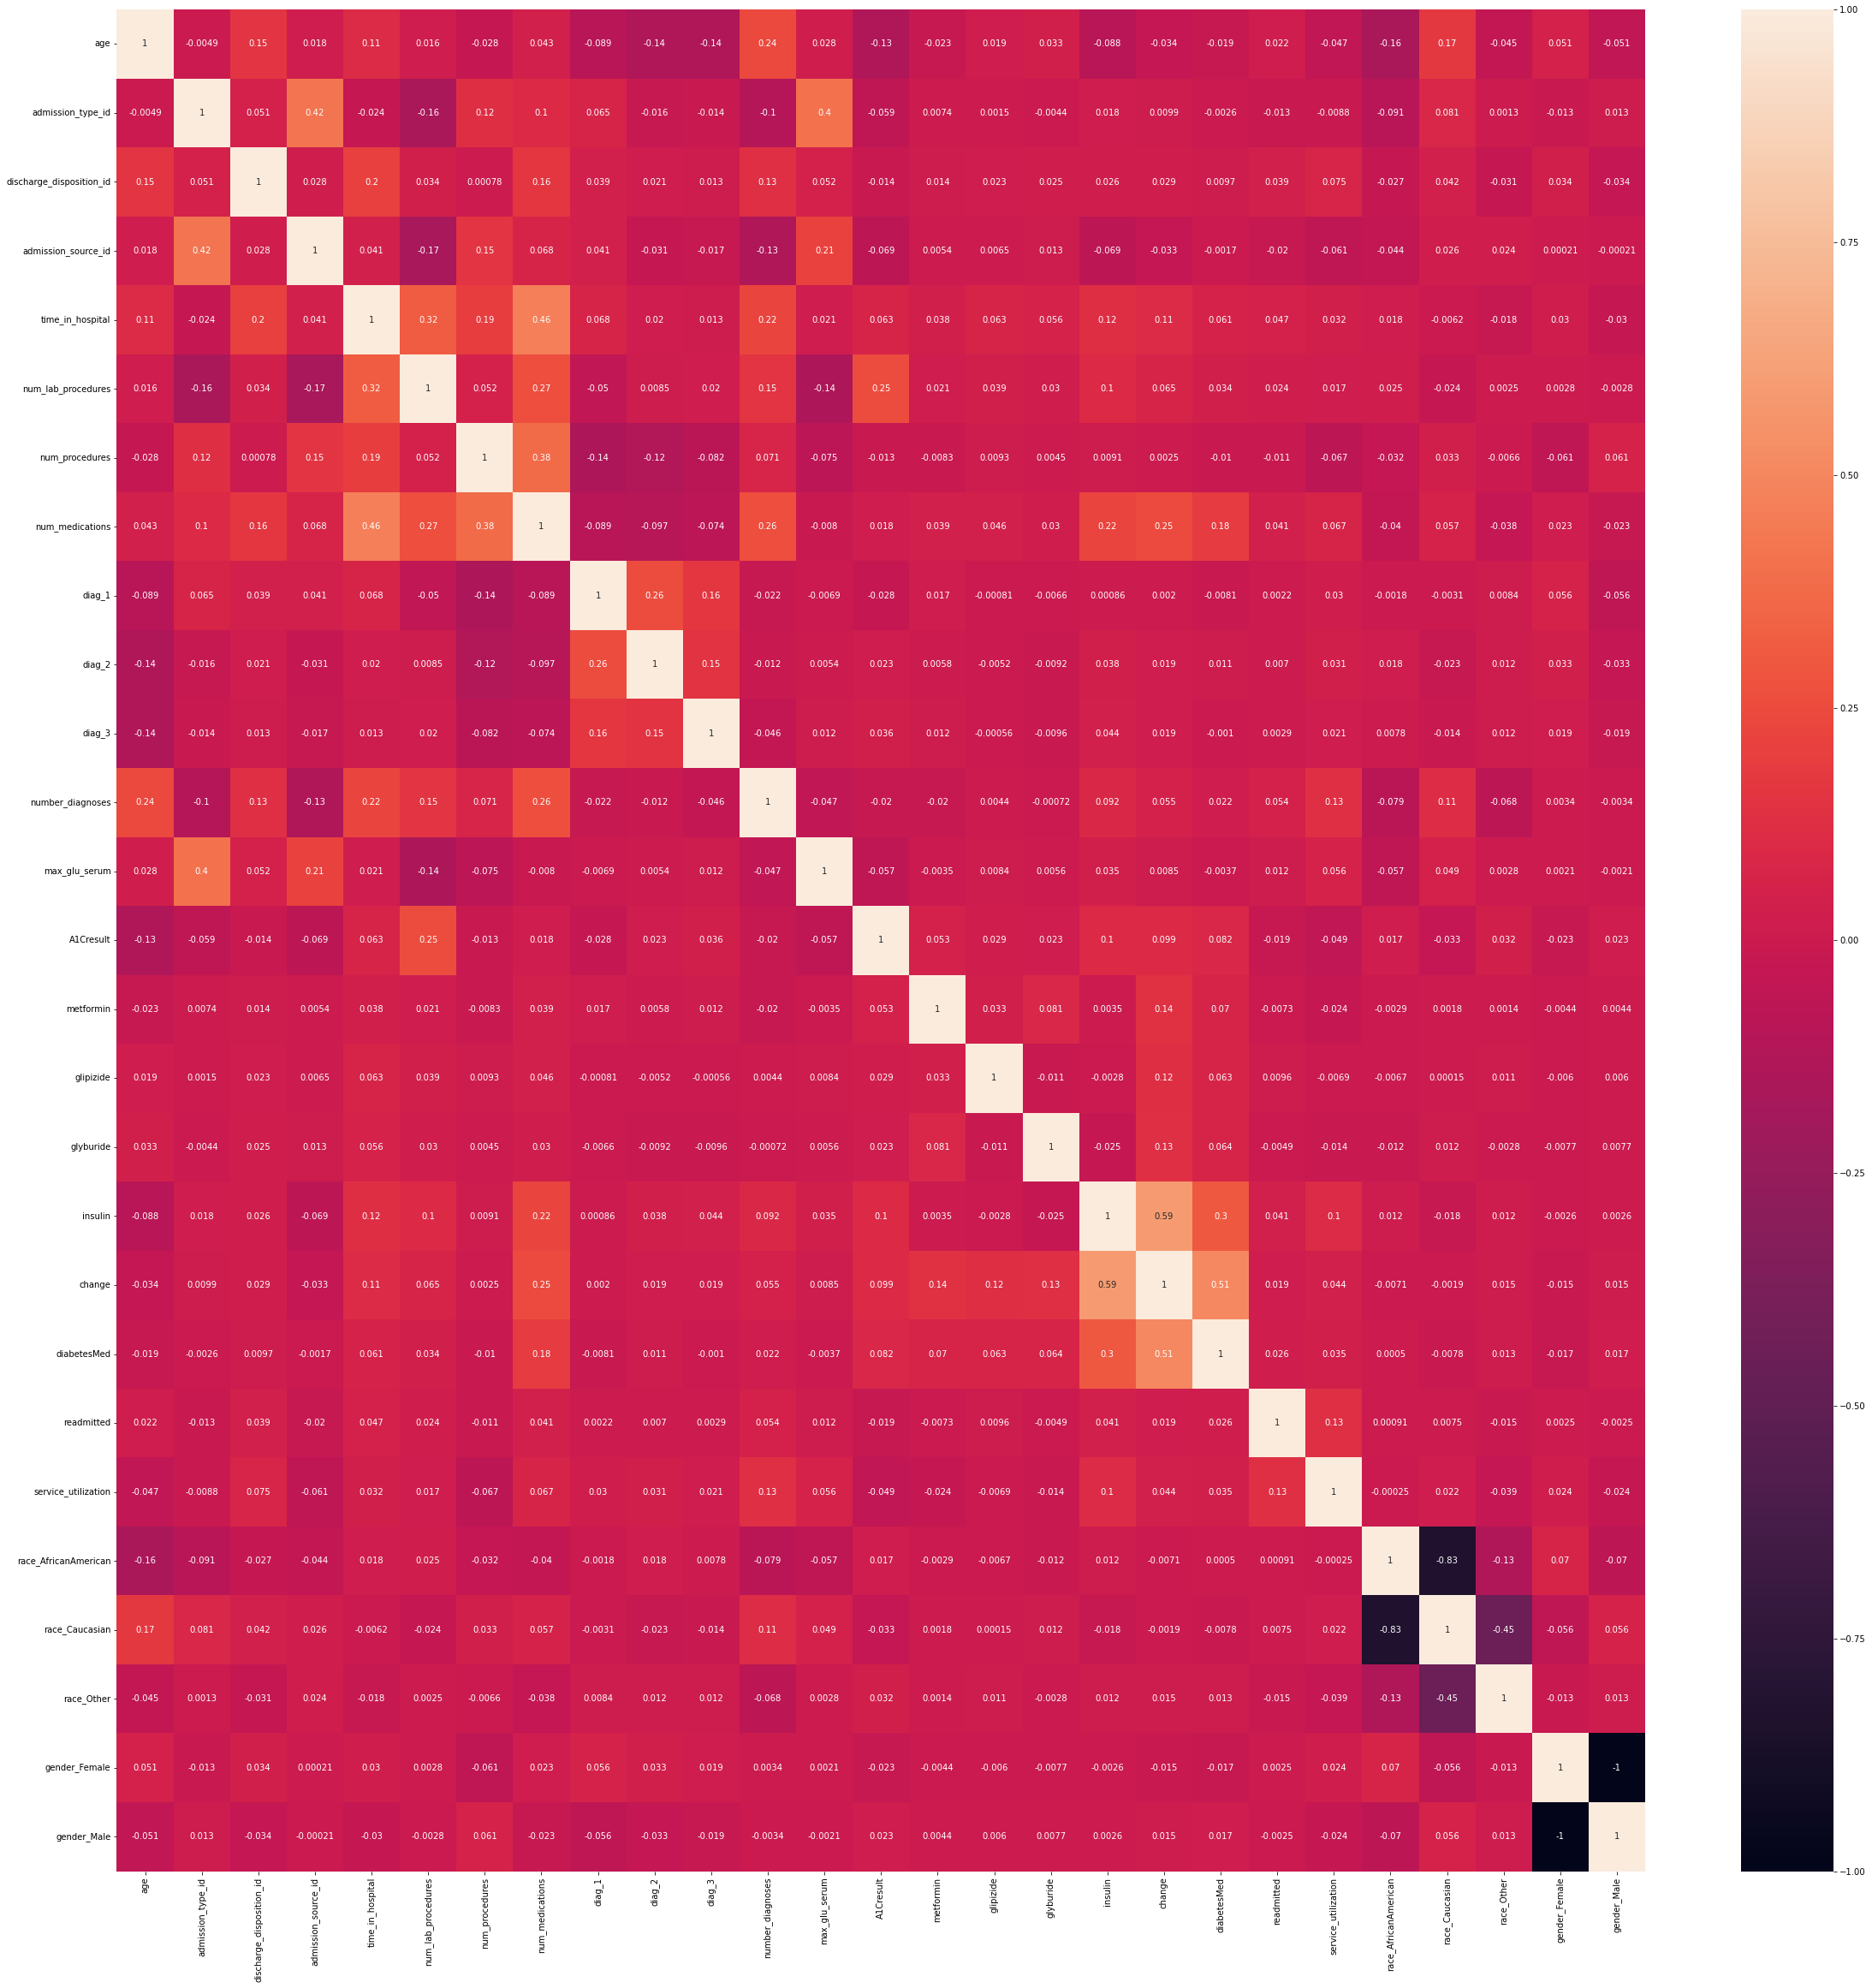

In [101]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, annot=True)           

In [102]:
df.shape

(99320, 27)

In [103]:
df.columns

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glipizide', 'glyburide', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'service_utilization', 'race_AfricanAmerican',
       'race_Caucasian', 'race_Other', 'gender_Female', 'gender_Male'],
      dtype='object')

In [104]:
df.drop(['admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult','service_utilization', 'race_AfricanAmerican',
       'race_Caucasian', 'race_Other', 'gender_Female', 'gender_Male'],axis=1)

,age,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted
0,5,0,0,0,0,0,0,0
1,15,0,0,0,1,1,1,0
2,25,0,0,0,0,0,1,0
3,35,0,0,0,1,1,1,0
4,45,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
101761,75,0,0,0,1,1,1,0
101762,85,0,0,0,0,0,1,0
101763,75,0,0,0,1,1,1,0
101764,85,0,0,0,1,1,1,0


We have 1lakh records in our dataset. we are randomly sampling it to 50% of original dataset for improving the speed.

In [105]:
df = df.sample(frac=0.5, random_state=42)

In [106]:
X = df.drop('readmitted',axis=1)
y = df['readmitted']

In [107]:
from sklearn.preprocessing import MinMaxScaler
min_max =MinMaxScaler()
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [108]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,...,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000,49660.000000
mean,0.674844,0.195006,0.197241,0.208458,0.260098,0.327778,0.222980,0.192257,0.383087,0.443629,...,0.013492,0.230648,0.463693,0.773681,0.015083,0.189932,0.746617,0.063451,0.540254,0.459746
std,0.177163,0.331710,0.333925,0.286193,0.228740,0.153067,0.284485,0.103733,0.375888,0.411661,...,0.115369,0.421252,0.498685,0.418452,0.028977,0.392251,0.434953,0.243776,0.498382,0.498382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.555556,0.000000,0.000000,0.000000,0.076923,0.234375,0.000000,0.115385,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.000000,0.000000,0.000000,0.230769,0.335938,0.166667,0.179487,0.250000,0.375000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.777778,0.500000,0.200000,0.333333,0.384615,0.437500,0.333333,0.243590,0.750000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.025000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
y.value_counts(normalize=True)

0    0.88377
1    0.11623
Name: readmitted, dtype: float64

# Machine Learning Algorithms¶

In [110]:
#machine learning packages (sklearn + xgboost)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from warnings import filterwarnings
filterwarnings('ignore')

In [111]:
#SMOTE

In [112]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_up, y_up = smote.fit_resample(X, y)


In [113]:
# checking target column to make sure its balanced

y_up.value_counts(normalize=True)

0    0.5
1    0.5
Name: readmitted, dtype: float64

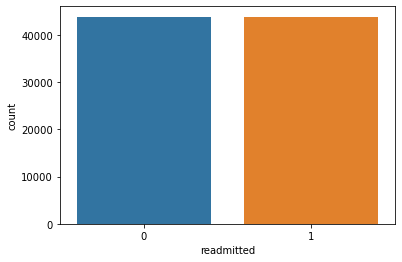

In [114]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_up)
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, random_state=42, test_size=0.25)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (65832, 26)
Shape of X_test:  (21944, 26)
Shape of y_train:  (65832,)
Shape of y_test:  (21944,)


In [116]:
# importing necessary libraries to get the test results

from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score, classification_report

#to get a consolidated test result:
results = {'Classification Model':[],'Accuracy':[], 'F1 Score':[]}

In [117]:
# Logistic regression

In [118]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='binary').round(4))
print('Precision Score: ',precision_score(y_test, y_pred).round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='binary').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='binary').round(4))

Classification Model: LogisticRegression
Accuracy Score:  0.5979
F1 Score:  0.5825
Precision Score:  0.6061
Recall Score:  0.5606
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.64      0.61     10966
           1       0.61      0.56      0.58     10978

    accuracy                           0.60     21944
   macro avg       0.60      0.60      0.60     21944
weighted avg       0.60      0.60      0.60     21944



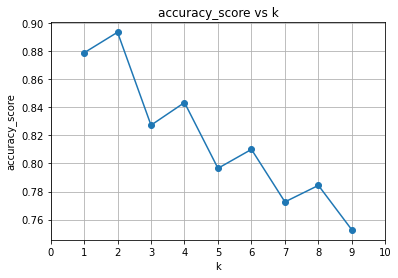

In [119]:
#kNN

# Finding the optimum k value
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(1,10)
for k in neighbors:
    clf=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    values.append(score)
    
# plotting k vs accuracy_score to get optimum k
plt.plot(neighbors, values, 'o-')
plt.title('accuracy_score vs k')
plt.xticks(np.arange(0.0, 11.0, 1.0))
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.grid()
plt.show()

In [120]:
# performing test with k=2

clf=KNeighborsClassifier(n_neighbors=2, metric='minkowski')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: KNeighborsClassifier
F1 Score:  0.8929
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88     10966
           1       0.84      0.97      0.90     10978

    accuracy                           0.89     21944
   macro avg       0.90      0.89      0.89     21944
weighted avg       0.90      0.89      0.89     21944



In [380]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='binary').round(4))
print('Precision Score: ',precision_score(y_test, y_pred).round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='binary').round(4))

print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='binary').round(4))

Classification Model: DecisionTreeClassifier
Accuracy Score:  0.8675
F1 Score:  0.8688
Precision Score:  0.8605
Recall Score:  0.8774
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87     10966
           1       0.86      0.88      0.87     10978

    accuracy                           0.87     21944
   macro avg       0.87      0.87      0.87     21944
weighted avg       0.87      0.87      0.87     21944



In [ ]:
#Random Forest Classifier

In [121]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='binary').round(4))
print('Precision Score: ',precision_score(y_test, y_pred).round(4))

print('Recall Score: ',recall_score(y_test, y_pred, average='binary').round(4))

print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='binary').round(4))

Classification Model: RandomForestClassifier
Accuracy Score:  0.934
F1 Score:  0.9297
Precision Score:  0.9956
Recall Score:  0.8719
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10966
           1       1.00      0.87      0.93     10978

    accuracy                           0.93     21944
   macro avg       0.94      0.93      0.93     21944
weighted avg       0.94      0.93      0.93     21944



In [ ]:
#Gradient Boosting Classifier

In [122]:

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))

print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='binary').round(4))
print('Precision Score: ',precision_score(y_test, y_pred).round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='binary').round(4))

print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='binary').round(4))

Classification Model: GradientBoostingClassifier
Accuracy Score:  0.9217
F1 Score:  0.9153
Precision Score:  0.9982
Recall Score:  0.8451
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10966
           1       1.00      0.85      0.92     10978

    accuracy                           0.92     21944
   macro avg       0.93      0.92      0.92     21944
weighted avg       0.93      0.92      0.92     21944



In [ ]:
#Xtreme Gradient Boosting Classifier

In [123]:

import xgboost as xgb

clf = xgb.XGBClassifier(use_label_encoder =False)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='binary').round(4))
print('Precision Score: ',precision_score(y_test, y_pred).round(4))

print('Recall Score: ',recall_score(y_test, y_pred, average='binary').round(4))

print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='binary').round(4))

Classification Model: XGBClassifier
Accuracy Score:  0.9312
F1 Score:  0.9264
Precision Score:  0.9971
Recall Score:  0.8651
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     10966
           1       1.00      0.87      0.93     10978

    accuracy                           0.93     21944
   macro avg       0.94      0.93      0.93     21944
weighted avg       0.94      0.93      0.93     21944



In [124]:
#Consolidated Result:

ConResult = pd.DataFrame(results)
ConResult

,Classification Model,Accuracy,F1 Score
0,LogisticRegression,0.5979,0.5825
1,KNeighborsClassifier,0.8935,0.8929
2,RandomForestClassifier,0.9340,0.9297
3,GradientBoostingClassifier,0.9217,0.9153
4,XGBClassifier,0.9312,0.9264


Random Forest Classifier is giving highest accuracy and precision. So we are selecting this model and trying to fine tune the model

In [125]:
#from sklearn.model_selection import RandomizedSearchCV

param_grid1 = {
    'n_estimators': [50, 100, 500, 1000, 1500],
    'max_depth': range(2,11,2),
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rsearch1 = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid1,
                        scoring='f1', n_jobs=4, cv=3, return_train_score=True, random_state=42)
rsearch1.fit(X_train, y_train)

print('Best parameters: ',rsearch1.best_params_)
print('f1 Score: ',rsearch1.best_score_)

Best parameters:  {'n_estimators': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': False}
f1 Score:  0.8489593246269717


In [126]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'n_estimators': [50, 100, 200, 500]
}

gsearch1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid1,
                        scoring='f1', n_jobs=-1, cv=3, return_train_score=True)
gsearch1.fit(X_train, y_train)

print('Best parameters: ',gsearch1.best_params_)
print('f1 Score: ',gsearch1.best_score_)

Best parameters:  {'n_estimators': 500}
f1 Score:  0.9300722837402389


In [127]:
param_grid2 = {
  'max_depth': [25, 50, None]  
}

gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200), param_grid=param_grid2,
                        scoring='f1', n_jobs=-1, cv=3, return_train_score=True)
gsearch2.fit(X_train, y_train)

print('Best parameters: ',gsearch2.best_params_)
print('f1 Score: ',gsearch2.best_score_)

Best parameters:  {'max_depth': 25}
f1 Score:  0.9294088204793395


In [128]:
from sklearn.model_selection import RandomizedSearchCV

param_grid2 = {
  'max_depth': [60,80,100]  
}

rsearch2 = RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=200), param_distributions=param_grid2,
                        scoring='f1', n_jobs=-1, cv=3, return_train_score=True, random_state=42)
rsearch2.fit(X_train, y_train)

print('Best parameters: ',rsearch2.best_params_)
print('f1 Score: ',rsearch2.best_score_)

Best parameters:  {'max_depth': 60}
f1 Score:  0.9293999321464325


In [129]:
param_grid3 = {
  'min_samples_leaf': [1, 2, 3]  
}

gsearch3 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, max_depth=100), param_grid=param_grid3,
                        scoring='f1', n_jobs=-1, cv=3, return_train_score=True)
gsearch3.fit(X_train, y_train)

print('Best parameters: ',gsearch3.best_params_)
print('f1 Score: ',gsearch3.best_score_)

Best parameters:  {'min_samples_leaf': 1}
f1 Score:  0.929089577558126


In [130]:
param_grid4 = {
  'max_features': ['auto', 'sqrt']  
}

gsearch4 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=1), param_grid=param_grid4,
                        scoring='f1', n_jobs=-1, cv=3, return_train_score=True)
gsearch4.fit(X_train, y_train)

print('Best parameters: ',gsearch4.best_params_)
print('f1 Score: ',gsearch4.best_score_)

Best parameters:  {'max_features': 'auto'}
f1 Score:  0.929803026577007


In [131]:
param_grid5 = {
  'bootstrap': [True, False]  
}

gsearch5 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=1, max_features='auto'), param_grid=param_grid5,
                        scoring='f1', n_jobs=-1, cv=3, return_train_score=True)
gsearch5.fit(X_train, y_train)

print('Best parameters: ',gsearch5.best_params_)
print('f1 Score: ',gsearch5.best_score_)

Best parameters:  {'bootstrap': False}
f1 Score:  0.9314754697635856


In [132]:
# classification chart of final RF model
import time
start = time.time()
RF1 = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=1, max_features='auto', bootstrap=False)
RF1.fit(X_train, y_train)
stop = time.time()
y_pred = RF1.predict(X_test)
RF1_time = stop-start
print('Classification Model: {}'.format(RF1.__class__.__name__))
print('Execution time is: ',RF1_time,'seconds')
print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Model: RandomForestClassifier
Execution time is:  40.222153425216675 seconds
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10966
           1       1.00      0.87      0.93     10978

    accuracy                           0.94     21944
   macro avg       0.94      0.94      0.94     21944
weighted avg       0.94      0.94      0.94     21944



In [134]:
import pickle
pickle.dump(RF1, open(r'C:\Users\USER\Documents\py pyt\rfc_model.pkl', 'wb'))